In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print(type(cancer))
print(cancer)
# np.c_[A,B] A와 B를 연결, np.append(A,B) A에 B를 추가
df=pd.DataFrame(np.c_[cancer['data'],cancer['target']],
               columns=np.append(cancer['feature_names'],['target']))
df.head()

<class 'sklearn.utils.Bunch'>
{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.shape

(569, 31)

In [11]:
#csv 파이롤 저장 ,row index는 저장하지 않음
df.to_csv('d:/data/cancer/cancer.csv',index=False)

In [12]:
df['target'].value_counts() #0 악성 212, 1 양성 357

1.0    357
0.0    212
Name: target, dtype: int64

In [13]:
train_cols=df.columns[0:30]
X=df[train_cols] #독립변수
y=df['target'] #종속변수

In [15]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['target'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [16]:
df2['target'].value_counts() #0 악성 212, 양성 212

1.0    212
0.0    212
Name: target, dtype: int64

In [22]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=10)

[0.9385964912280702, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9210526315789473, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088, 0.9298245614035088]
최대값: 0.9385964912280702
(array([0], dtype=int64),)
최적의 k: 1


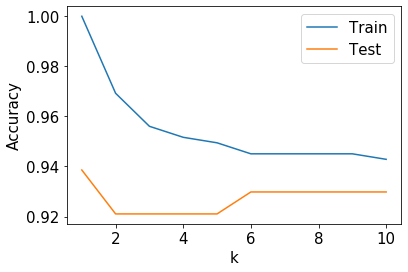

In [27]:
#최적 이웃의 갯수(k)를 구하는 과정
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11)
for n in neighbors: 
    knn=KNeighborsClassifier(n_neighbors=n) #knn 모형
    knn.fit(X_train,y_train) #기계학습
    # 학습용, 검증용 정확도 점수를 리스트에 추가
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test,y_test))
    
plt.rcParams['font.size']=15 #그래프의 사이즈 설정
plt.plot(neighbors,train_rate,label='Train') #학습용 정확도 그래프
plt.plot(neighbors,test_rate,label='Test') #검증용 정확도 그래프
plt.ylabel('Accuracy') #x축의 라벨
plt.xlabel('k') #y축의 라벨
plt.legend() #범례표시
print(test_rate)
max_rate=max(test_rate)
print('최대값:',max_rate)
print(np.where(test_rate == max_rate))
idx=np.where(test_rate == max_rate)[0][0]
print('최적의 k:',idx+1)

In [28]:
#최적의 k값으로 만든 모형
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
print('학습용:{:5.1f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:5.1f}%'.format(model.score(X_test,y_test)*100))

학습용:100.0%
검증용: 93.9%


In [32]:
#오분류표(혼동행렬)
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)#예측값
print(pred) #예측값
print(y_test.values) #실제값
cm=confusion_matrix(y_test,pred) #실제값과 예측값 비교
df_cm=pd.DataFrame(cm,index=['악성','양성'],columns=['악성','양성'])
df_cm

[0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.]
[0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0.]


,악성,양성
악성,35,4
양성,3,72
